#Distance Formulas

Some overview of distance formulas to get familiar with KNN concepts...

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
import pandas as pd
from sklearn import cross_validation
df = pd.read_csv("../../Data/credit-data-post-import.csv")

train, test = cross_validation.train_test_split(df)
train = pd.DataFrame(train, columns=df.columns)
test = pd.DataFrame(test, columns=df.columns)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

income_imputer = KNeighborsRegressor(n_neighbors=1)

# split our data into 2 groups; data containing nulls, and data not containing nulls.
# we'll train on the latter and make 'predictions' on the null data to impute monthly_income
train_w_monthly_income = train[train.monthly_income.isnull()==False]
train_w_null_monthly_income = train[train.monthly_income.isnull()==True]

In [4]:
correlations = train_w_monthly_income.corr()

# which columns are most correlated with monthly income?
# This will be one quick way to help us find our KNN features

monthly_income_correlations = pd.Series(correlations.ix[:, 5])
monthly_income_correlations.order(ascending=False)

monthly_income                                 1.000000
number_real_estate_loans_or_lines              0.149298
number_of_open_credit_lines_and_loans          0.108161
number_of_dependents                           0.071398
age                                            0.044655
revolving_utilization_of_unsecured_lines       0.008618
number_of_time30-59_days_past_due_not_worse   -0.012306
number_of_time60-89_days_past_due_not_worse   -0.013400
number_of_times90_days_late                   -0.015412
serious_dlqin2yrs                             -0.023420
debt_ratio                                    -0.038782
Name: monthly_income, dtype: float64

In [5]:
cols = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']

income_imputer = KNeighborsRegressor(n_neighbors=1, p=2)
income_imputer.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

# fill in the missing data with the imputed values!
train_w_null_monthly_income['monthly_income'] = income_imputer.predict(train_w_null_monthly_income[cols])

test['monthly_income_imputed'] = income_imputer.predict(test[cols])
test[['monthly_income', 'monthly_income_imputed']].head()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,monthly_income,monthly_income_imputed
0,1600,7090
1,7890,2339
2,11100,9767
3,7497,1941
4,8000,8500


#KNN as a Classifier

In [12]:
from sklearn import grid_search, datasets
from sklearn.neighbors import KNeighborsClassifier
iris = datasets.load_iris()
parameters = {'p': [2], 'n_neighbors':range(1, 100)}
knn = KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, parameters, scoring='accuracy')
clf.fit(iris.data, iris.target)                            

GridSearchCV(cv=None,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'p': [2], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

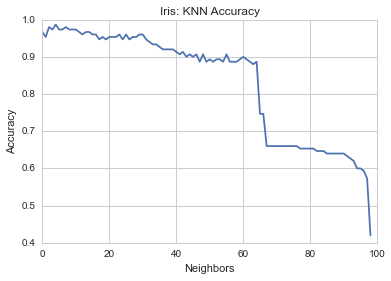

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
scores = [i.mean_validation_score for i in clf.grid_scores_]
plt.plot(scores)
plt.title('Iris: KNN Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

In [8]:
parameters = {'p': [2], 'n_neighbors':range(1, 21)}
knn = KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, parameters, scoring='accuracy')
clf.fit(iris.data, iris.target)    

GridSearchCV(cv=None,
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'p': [2], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

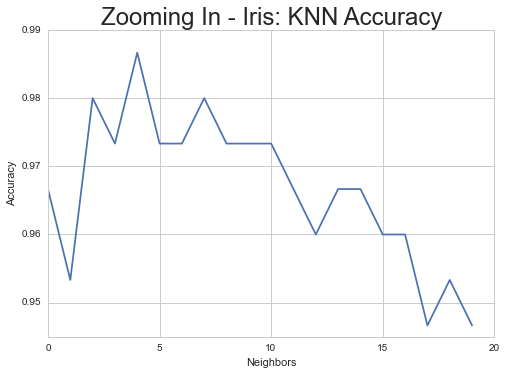

In [9]:
scores = [i.mean_validation_score for i in clf.grid_scores_]
plt.plot(scores)
plt.title('Zooming In - Iris: KNN Accuracy', fontsize=24)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

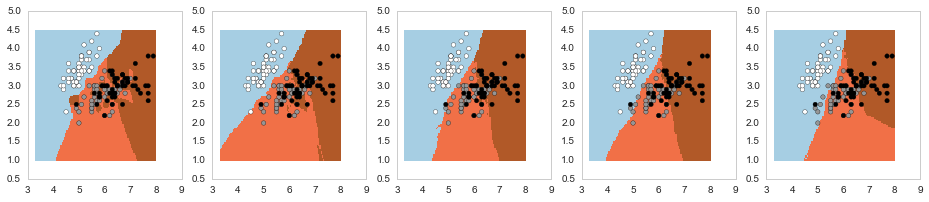

In [14]:
import numpy as np
def plot_estimator(estimator, X, y, ax, pos):
    estimator.fit(X,y)
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + .1
    xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # perform classification on our samples
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
                        
    # Put the result into a color plot
    Z = Z.reshape (xx.shape)
    ax[pos].pcolormesh(xx,yy, Z, cmap=plt.cm.Paired)
                        
    # Lets plot our sample points
    ax[pos].scatter(X[:,0], X[:,1], c=y)
    
fig, axes = plt.subplots(1, 5, figsize=[16, 3])
for e, k in enumerate([1, 5, 40, 60, 100]):
    plot_estimator(KNeighborsClassifier(n_neighbors=k), iris.data[:,:2], iris.target, axes, e)

##Caveats about K Nearest Neighbors

* Training Neighbors is a huge cost (n2). This essentially means for every observation, it takes that amount of time squared to compute. So 2 observations = 4 compute, 4 observations = 16 compute. In contrast, a regression would take just as long to compute (roughly) the number of features equal to the number of observations for KNN.
* What happens if we train for 4 neighbors and the nearest are 2 of each class? Most algorithms run on a sort, so it just picks the "first" one that hit 2 values, but is that the right assumption to make? What steps could be made to avoid it?
* It's arguable that with increased dimensions (more features) points eventually become equidistant. This implies KNN would work better with less features.

#K Means
   ##Enter Unsupervised Learning: Beer Clustering

In [1]:
import pandas as pd
beers = pd.read_csv('../../Data/beer.txt', sep=' ')

beers.head()

,Beer,Calories,Sodium,Alcohol,Cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [3]:
beers

,Beer,Calories,Sodium,Alcohol,Cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a79b750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11afadb50>]], dtype=object)

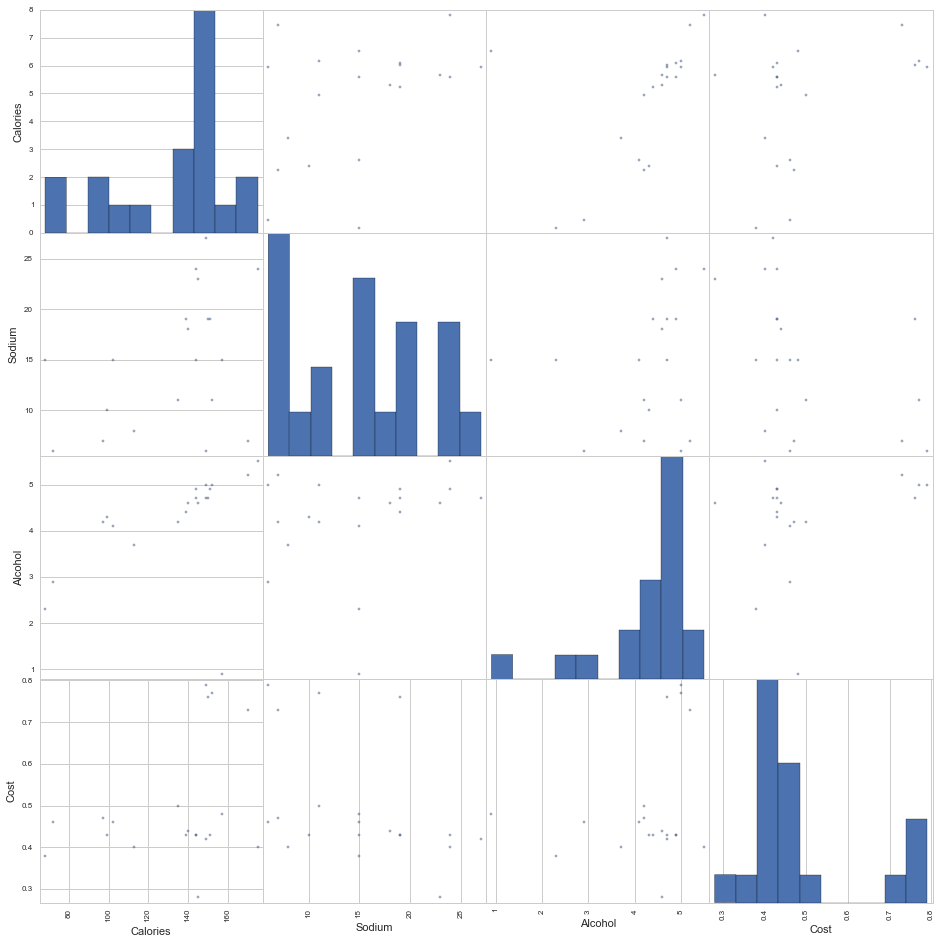

In [17]:
cols = ['Beer','Calories','Sodium','Alcohol','Cost']
pd.scatter_matrix(beers[cols],figsize=(16, 16))

(1, 75)

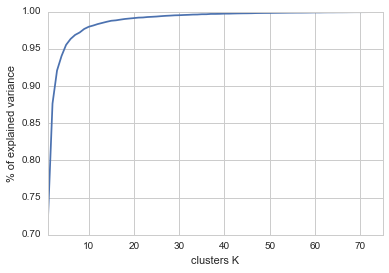

In [15]:
from sklearn import cluster
from __future__ import division

sepal_data = iris.data[:, :2]
krange = range(1, int(sepal_data.shape[0] / 2))
sum_squares = [cluster.KMeans(n_clusters=k).fit(sepal_data).inertia_ for k in krange]

variance_explained = [1.0 - (s / sum(sum_squares)) for s in sum_squares]
plt.figure()
plt.plot(range(1, 75), variance_explained)
plt.ylabel('% of explained variance')
plt.xlabel('clusters K')
plt.xlim([1, 75])

(1, 11)

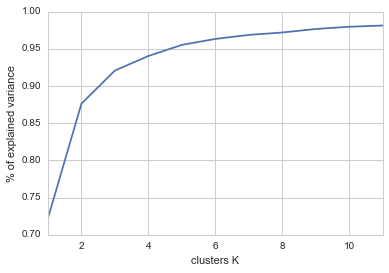

In [18]:
plt.figure()
plt.plot(range(1, 12), variance_explained[:11])
plt.ylabel('% of explained variance')
plt.xlabel('clusters K')
plt.xlim([1, 11])

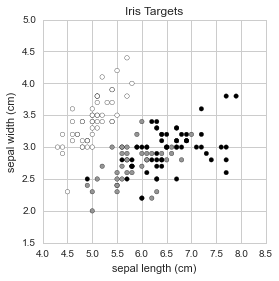

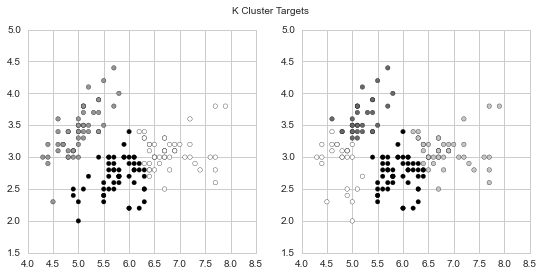

In [19]:
## -- Actual --
plt.figure(figsize=[4, 4])
plt.scatter(sepal_data[:, 0], sepal_data[:, 1], c=iris.target)
plt.title('Iris Targets')
plt.ylabel(iris.feature_names[1])
plt.xlabel(iris.feature_names[0])

## -- 3 Clusters --
clusters_3 = cluster.KMeans(n_clusters=3).fit(sepal_data)
fig, ax = plt.subplots(1, 2, figsize=[9, 4])
fig.suptitle('K Cluster Targets')
ax[0].scatter(sepal_data[:, 0], sepal_data[:, 1], c=clusters_3.predict(sepal_data))

## -- 4 Clusters --
clusters_4 = cluster.KMeans(n_clusters=4).fit(sepal_data)
ax[1].scatter(sepal_data[:, 0], sepal_data[:, 1], c=clusters_4.predict(sepal_data))

In [20]:
from sklearn import tree

# fit a classification tree with max_depth=2 on all data
treeclf = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
treeclf.fit(sepal_data, clusters_3.predict(sepal_data))

# create a Graphviz file
with open("iris_clusters.dot", 'wb') as f:
    f = tree.export_graphviz(treeclf, out_file=f, feature_names=iris.feature_names[:3])

##On Your Own

1. Work through the beer.txt file in the data section of the repo. It is fairly small.

    * Determine if and what data needs to be scaled in order to solve the clusters.
    * Given the data set, what should be the maximum number of clusters, given the rule of thumb?
    * Use the elbow rule (% variance explained) to find how many clusters of data points we'd expect to explain the datas set.
    * Build the model with k defined.
    * Use a decision tree to build and explain the clusters back.
    
2. **Scraping**: Use the code below to pull down search results for data science.

    * How many results does one page have?
    * How would you iterate through page of results? Observe how "start" works in the query string.
    * Update to extend the data frame to have at least 1000 results of text.
    * Vectorize the sentences using CountVectorizer
    * consider using [tfidf](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) instead (for fun)
    * Use KMeans to identify text clusters. What patterns exist in the search results for data science in Google?

(1, 10)

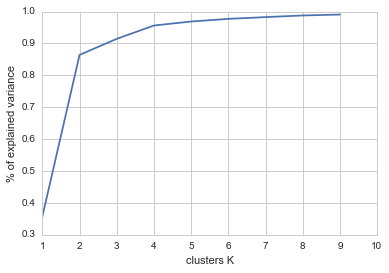

In [26]:
cols = ['Calories','Sodium','Alcohol','Cost']

krange = range(1, int(beers.shape[0] / 2))
sum_squares = [cluster.KMeans(n_clusters=k).fit(beers[cols]).inertia_ for k in krange]

variance_explained = [1.0 - (s / sum(sum_squares)) for s in sum_squares]
plt.figure()
plt.plot(range(1, 10), variance_explained)
plt.ylabel('% of explained variance')
plt.xlabel('clusters K')
plt.xlim([1, 10])

(1, 10)

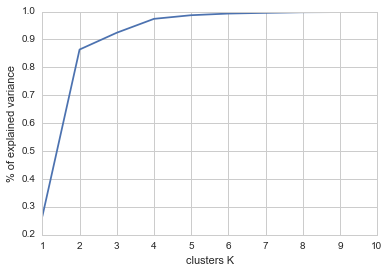

In [27]:
cols = ['Calories','Alcohol']

krange = range(1, int(beers.shape[0] / 2))
sum_squares = [cluster.KMeans(n_clusters=k).fit(beers[cols]).inertia_ for k in krange]

variance_explained = [1.0 - (s / sum(sum_squares)) for s in sum_squares]
plt.figure()
plt.plot(range(1, 10), variance_explained)
plt.ylabel('% of explained variance')
plt.xlabel('clusters K')
plt.xlim([1, 10])

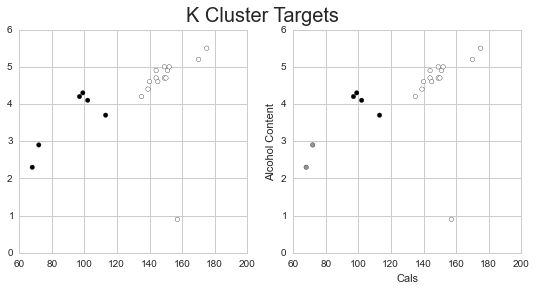

In [36]:
## -- 2 Clusters --
clusters_2 = cluster.KMeans(n_clusters=2).fit(beers[cols])
fig, ax = plt.subplots(1, 2, figsize=[9, 4])
fig.suptitle('K Cluster Targets', fontsize=20)
ax[0].scatter(beers['Calories'], beers['Alcohol'], c=clusters_2.predict(beers[cols]))

## -- 3 Clusters --
clusters_3 = cluster.KMeans(n_clusters=3).fit(beers[cols])
ax[1].scatter(beers['Calories'], beers['Alcohol'], c=clusters_3.predict(beers[cols]))

plt.ylabel('Alcohol Content')
plt.xlabel('Cals')